# Question 2
## q2.1
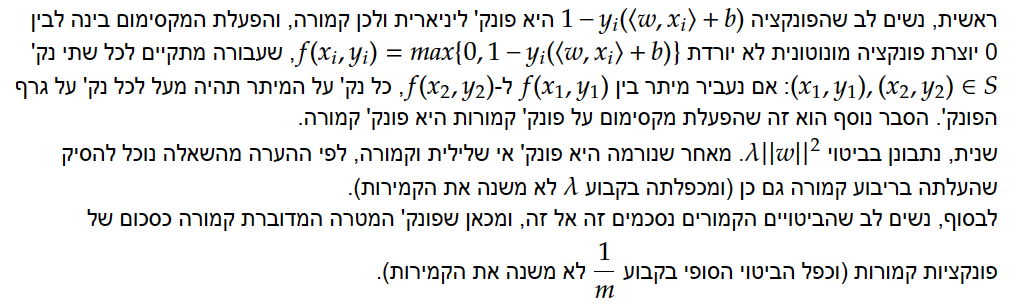

## q2.2
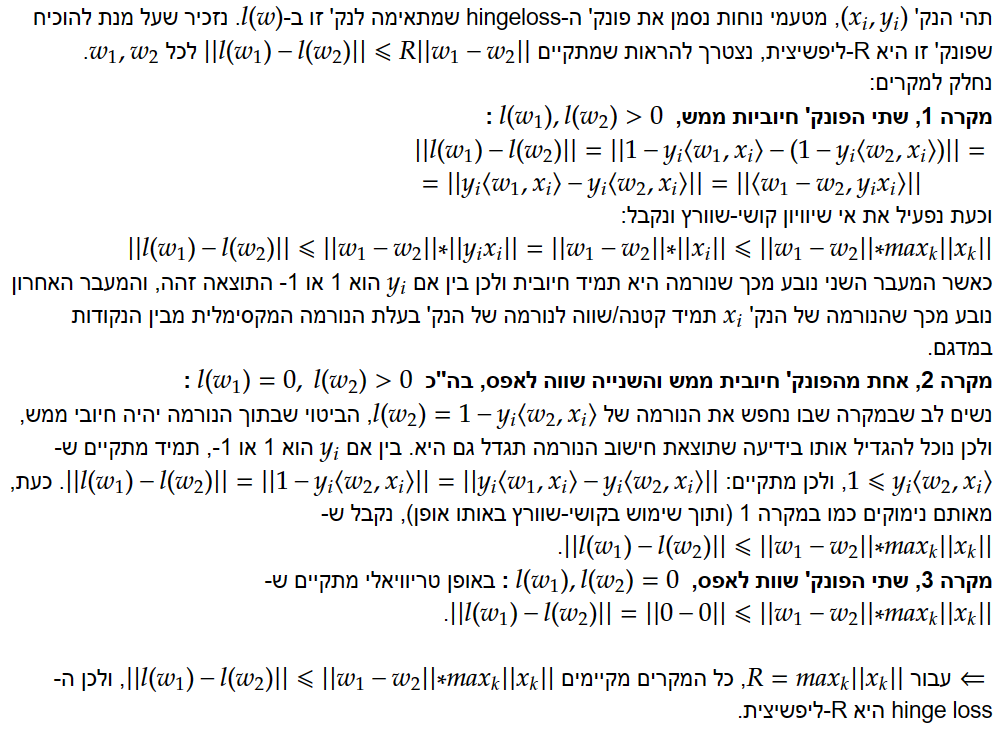

## q2.3
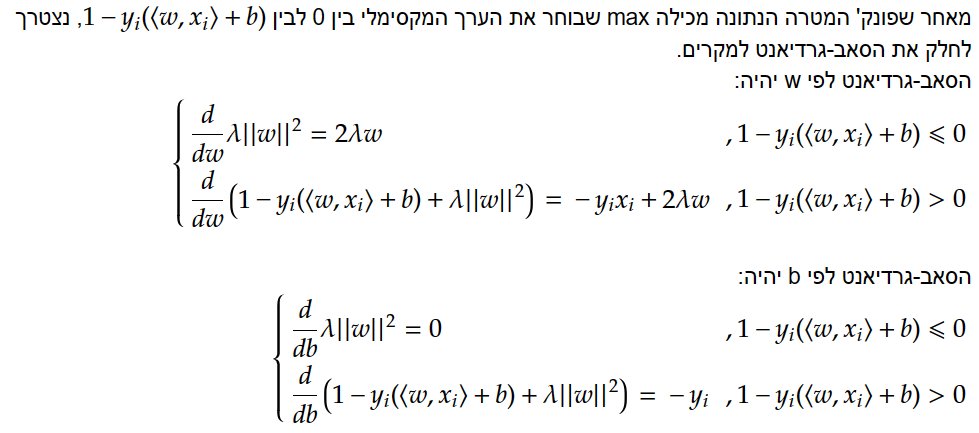

## q2.4

In [1]:
import numpy as np
from random import randint
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def weights_and_bias_per_iter(x, label, w, b, l_rate, lam):
    """ Update weights and bias for each epoch of the SGD algorithm. """
    if (1 - label * (np.dot(w, x) + b)) <= 0:
        w = w - l_rate * 2 * lam * w
        b = 0
    else:
        w = w - l_rate * (2 * lam * w - label * x)
        b = b + l_rate * label
    return w, b

In [3]:
def svm_with_sgd(X, y, lam=0, epochs=1000, l_rate=0.01, sgd_type='practical'):
    """ Params:
        X: Matrix of the train data, where each row is a sample.
        y: Vector of the train labels, where each element is the label of the corresponding sample.
        lam: Regularization parameter, a non-negative value.
        epochs: Number of iterations to perform on the training data.
        l_rate: Learning rate, the size of the step to take in the direction of the gradient.
        sgd_type: The type of the stochastic gradient descent to use, either 'practical' or 'theory'.
    """
    np.random.seed(2)
    num_samples, num_features = X.shape  # m, d
    w = np.random.uniform(size=num_features)
    b = np.random.uniform()

    if sgd_type == 'practical':
        for _ in range(epochs):
            permutation = np.random.permutation(num_samples)
            for i in permutation:
                w, b = weights_and_bias_per_iter(X[i], y[i], w, b, l_rate, lam)
        return w, b

    if sgd_type == 'theory':
        epochs *= num_samples
        w = [w]
        b = [b]
        for epoch in range(epochs):
            i = randint(0, num_samples - 1)
            w_and_b_per_iter = weights_and_bias_per_iter(X[i], y[i], w[epoch], b[epoch], l_rate, lam)
            w.append(w_and_b_per_iter[0])
            b.append(w_and_b_per_iter[1])

        w_bar = sum(w) / len(w)
        b_bar = sum(b) / len(b)
        return w_bar, b_bar        

## q2.5

In [13]:
def calculate_error(w, b, X, y):
    """ Params:
        w: The weights vector.
        b: The bias term.
        X: The dataset matrix, where each row is a sample.
        y: The labels vector, where each element is the label of the corresponding sample.
    """
    y_pred = np.sign(np.dot(w, X.T) + b)
    return np.sum(y_pred != y) / len(y)

## q2.6

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
non_zero_mask = y != 0
X = X[non_zero_mask]
y = y[non_zero_mask]
y[y == 2] = -1
X = X[:, 2:4]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

lambdas = [0, 0.05, 0.1, 0.2, 0.5]
train_errs, val_errs, margin_widths = list(), list(), list()
for lam in lambdas:
    w, b = svm_with_sgd(X_train, y_train, lam=lam, sgd_type='practical')
    train_errs.append(calculate_error(w, b, X_train, y_train))
    val_errs.append(calculate_error(w, b, X_val, y_val))
    margin_widths.append(1 / np.linalg.norm(w))


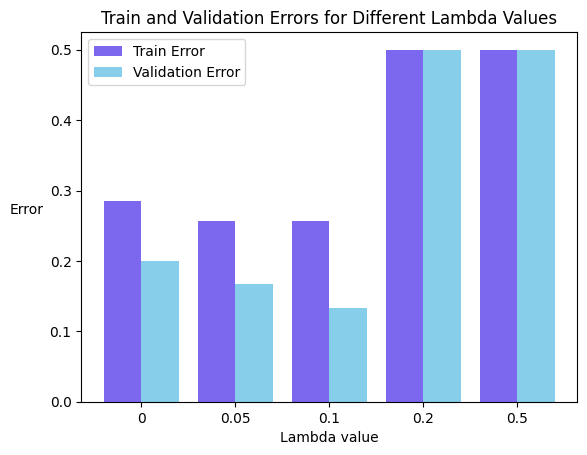

In [21]:
import matplotlib.pyplot as plt

x_axis = np.arange(len(lambdas))
bar_width = 0.4
plt.bar(x_axis - bar_width/2, train_errs, bar_width, label='Train Error', color='mediumslateblue')
plt.bar(x_axis + bar_width/2, val_errs, bar_width, label='Validation Error', color='skyblue')

plt.xticks(x_axis, lambdas)
plt.xlabel('Lambda value')
plt.ylabel('Error', rotation='horizontal', ha='right')
plt.legend()
plt.title('Train and Validation Errors for Different Lambda Values')
plt.show()

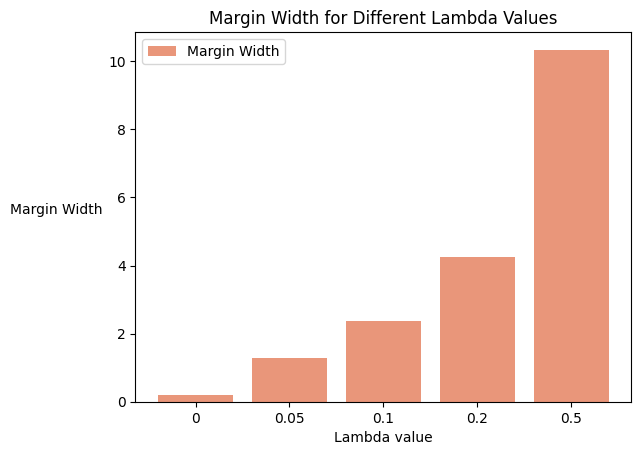

In [20]:
plt.bar(x_axis, margin_widths, label='Margin Width', color='darksalmon')
plt.xticks(x_axis, lambdas)
plt.xlabel('Lambda value')
plt.ylabel('Margin Width', rotation='horizontal', ha='right')
plt.legend()
plt.title('Margin Width for Different Lambda Values')
plt.show()

It seems that the best model is the one with lambda=0.1, because it minimizes the error on the test and train. The margin size is not too small, so we avoid overfitting, and it is also not too big, so we also avoid large error values.